# 自行開發K-Means

## 載入相關套件

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

## 歐幾里得距離函數

In [2]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data) ** 2, axis=1))

## K-Means演算法類別

In [3]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters  # 組數
        self.max_iter = max_iter  # EM 最大次數

    # 訓練
    def fit(self, X_train):
        # 生成1個質心
        self.centroids = [random.choice(X_train)]
        # 生成其他 n-1 個質心
        for _ in range(self.n_clusters - 1):
            # Calculate distances from points to the centroids
            dists = np.sum(
                [euclidean(centroid, X_train) for centroid in self.centroids], axis=0
            )
            # 正規化
            dists /= np.sum(dists)
            # 依據距離作為機率，隨機產生質心
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)[0]
            self.centroids += [X_train[new_centroid_idx]]

        iteration = 0
        prev_centroids = [np.zeros(X_train.shape[1])] * self.n_clusters
        while (
            np.not_equal(self.centroids, prev_centroids).any()
            and iteration < self.max_iter
        ):
            # 找到最近的質心
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # 尋找新質心
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                # 如果組內沒有任何樣本點，沿用上次的質心
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
        # print(iteration)

    # 模型評估
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs

## 生成分類資料

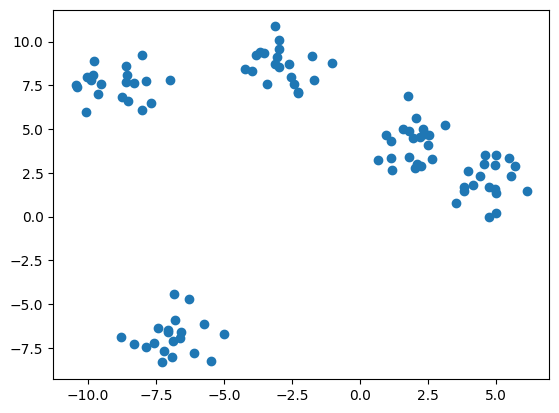

In [4]:
from sklearn.datasets import make_blobs

X_train, true_labels = make_blobs(n_samples=100, centers=5, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1]);

## 模型訓練

In [5]:
from sklearn.preprocessing import StandardScaler

# 標準化
X_train = StandardScaler().fit_transform(X_train)

# 訓練
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)

## 模型評估

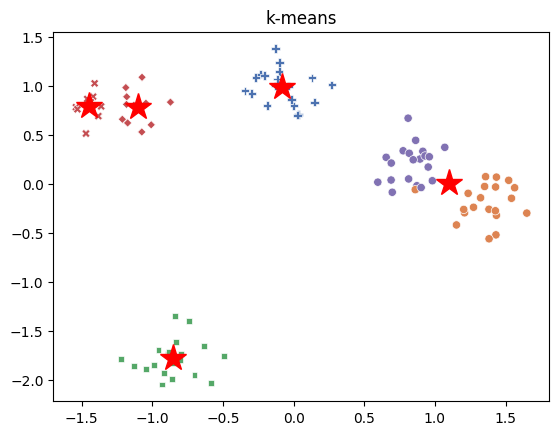

In [6]:
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    style=classification,
    palette="deep",
    legend=None,
)
plt.plot(
    [x for x, _ in kmeans.centroids],
    [y for _, y in kmeans.centroids],
    "*",
    markersize=20,
    color="r",
)
plt.title("k-means")
plt.show()

## 鳶尾花資料集測試

In [7]:
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)

# 標準化
X_train = StandardScaler().fit_transform(X)

# 訓練
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

## 模型評估

In [8]:
from sklearn.metrics import accuracy_score

_, y_pred = kmeans.evaluate(X_train)
print(accuracy_score(y, y_pred))

0.22


## 驗證

In [9]:
# 實際值
",".join([str(i) for i in y])

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2'

In [10]:
# 預測值
",".join([str(i) for i in y_pred])

'1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,2,2,2,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,2,2,0,2,0,2,2,0,2,0,0,2,2,2,2,0,2,0,2,0,2,2,0,0,2,2,2,2,2,0,0,2,2,2,0,2,2,2,0,2,2,2,0,2,2,0'

In [11]:
p = pd.Series(y_pred)
print(p[p == 1].index)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype='int64')


In [12]:
p = pd.Series(y)
print(p[p == 0].index)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype='int64')
